In [58]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

RANDOM_SEED = 2023

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')


X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## What's the shape of the data

Here MNIST is a set of 70,000 images each 28 X 28 pixels.

The target labels (y) are the actual number that each image represents.

In [59]:
print(X)
print(X.shape)
print(y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(70000, 784)
(70000,)


## View one digit of the set

1. Grab one of the records, each one being an image
2. Reshape it to 28 x 28
3. Plot using `plt.imshow()`

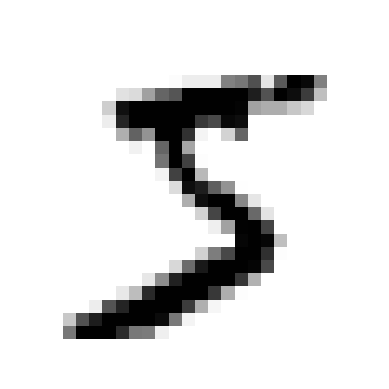

The image label: 5


In [60]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

some_digit = X[0] # first image
plot_digit(some_digit)
plt.show()

print(f'The image label: {y[0]}')

## Now split the data into train and test sets
This set is already pre-shuffled and split into training sets (first 60000) and test sets (10000)


In [61]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## First try a Binary Classifier

In this case we will first try to just classify whether an image represents a 5 or not

In [62]:
y_train_5 = (y_train == '5')
print(y_train_5.shape)
y_test_5 = (y_test == '5')
print(y_test_5.shape)

(60000,)
(10000,)


In [63]:
# fit the classifier to the data
sgd_clf = SGDClassifier(random_state=RANDOM_SEED)
sgd_clf.fit(X_train, y_train_5)

# Check to see if it correctly predicts our random image of '5'
some_digit_prediction = sgd_clf.predict([some_digit])
print(f'Initial prediction for y[0]: {some_digit_prediction}')

Initial prediction for y[0]: [ True]


## Try to measure accuracy using cross validation
Number of folds: 3

The accuracy of the SGD classifier is about 95%.

But that's not much better than a simple DummyClassifier, which has an accuracy of 90%.


The reason for this is that only about 10% of the data is actually a 5, so even if we guess
non-5 for every instance, we'd still be 90% accurate, which is what cross validation is showing.

In [64]:
# Check the ratio of 5's to non-5s in our training set.
print('+++++++++++++++++++++++')
s = pd.Series(y_train_5)
print(s.value_counts(normalize=True))

print('+++++++++++++++++++++++')
cv_result1 = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print(cv_result1)

print('+++++++++++++++++++++++')
# Compare with DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
dummy_cv_result1 = cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print(dummy_cv_result1)

+++++++++++++++++++++++
False    0.90965
True     0.09035
Name: proportion, dtype: float64
+++++++++++++++++++++++
[0.9587  0.9572  0.96035]
+++++++++++++++++++++++
[0.90965 0.90965 0.90965]
